In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram
import scipy.constants as c
from mcerp import N, umath, Gamma

# Faraday Analysis Example

In [5]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15


In [7]:
B0fn="13-May-2015 16_39_56_1355463638_fliplr.png"
B1fn="13-May-2015 16_39_56_2211629970.png"
S0fn="13-May-2015 17_00_09_1355463638_fliplr.png"
S1fn="13-May-2015 17_00_09_2211629970.png"
s0513_15_pol=PolarimetryMap2(B0fn, B1fn, B0fn, B1fn, S0fn, S1fn)
s=s0513_15_pol

In [8]:
s.register()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [16]:
s.pickle_transform('s0513_16 faraday registration.txt')

In [10]:
s.convert_to_alpha()

<IPython.core.display.Javascript object>


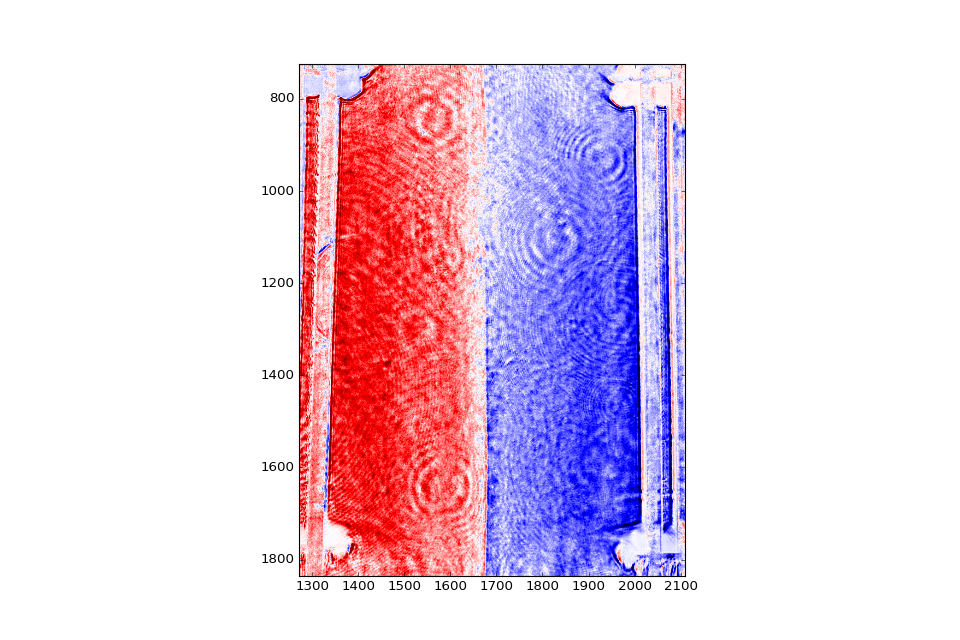

In [15]:
s.plot_data_px(clim=[-1,1])

<IPython.core.display.Javascript object>


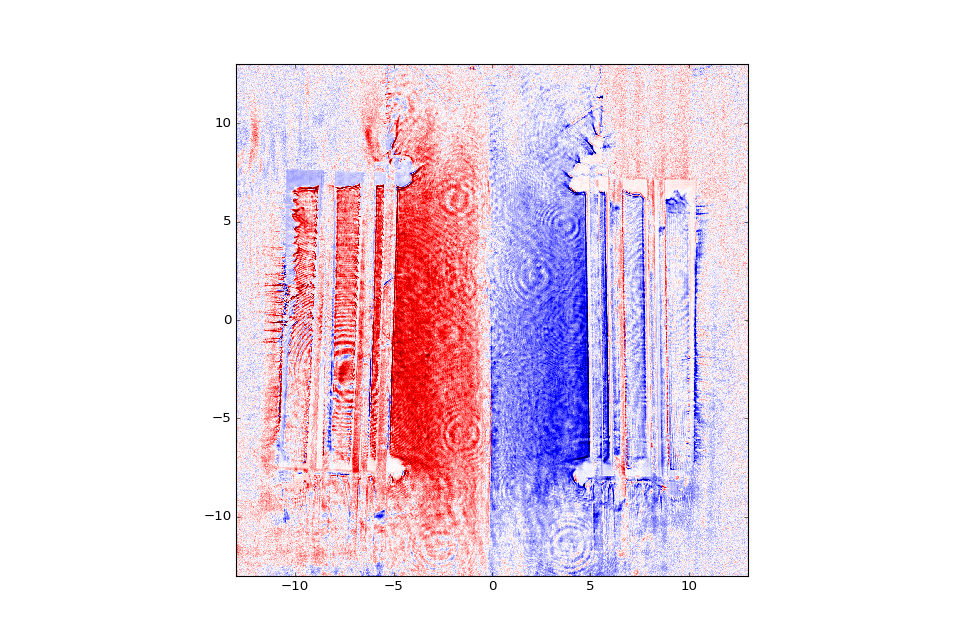

In [71]:
s.scale=67
s.set_origin([1255,1682], extent=[-13,13,-13,13])
s.plot_data_mm(clim=[-1,1])

In [145]:
cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


In [57]:
s0513_15_far=FaradayMap2(s0513_15_pol,"s0513_15 IR side on image registration flipud.jpg", "s0513_15 neL side on.txt")

In [137]:
f=s0513_15_far
f.register(constraints={'angle':(0,0.1),'scale':(0.7,0.1),'ty':(0,400),'tx':(40,400)})

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: divide by zero encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: overflow encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T


<IPython.core.display.Javascript object>


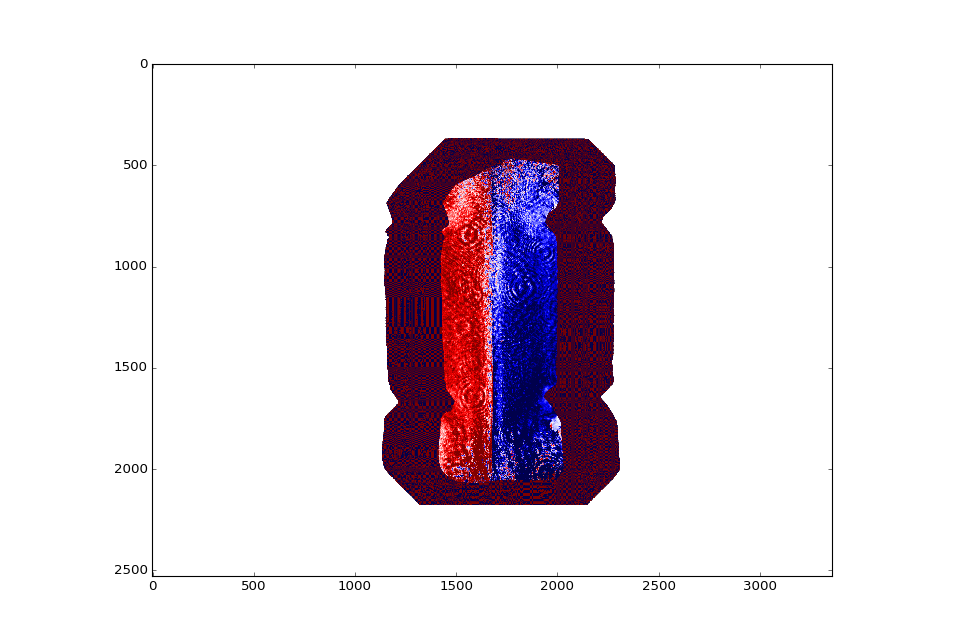

In [138]:
f.plot_data_px(clim=[-3,3])

In [68]:
f.transform

{'angle': -0.0004517333136675461,
 'scale': 0.71287100417764904,
 'tvec': array([ 10.08143623,  28.92796871])}

<IPython.core.display.Javascript object>


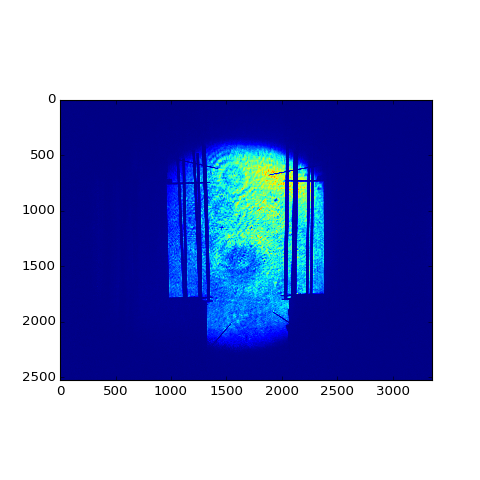

In [67]:
fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(np.flipud(f.pm.B0))

In [72]:
f.scale=s.scale
f.set_origin(s.origin, extent=[-13,13,-13,13])

<IPython.core.display.Javascript object>


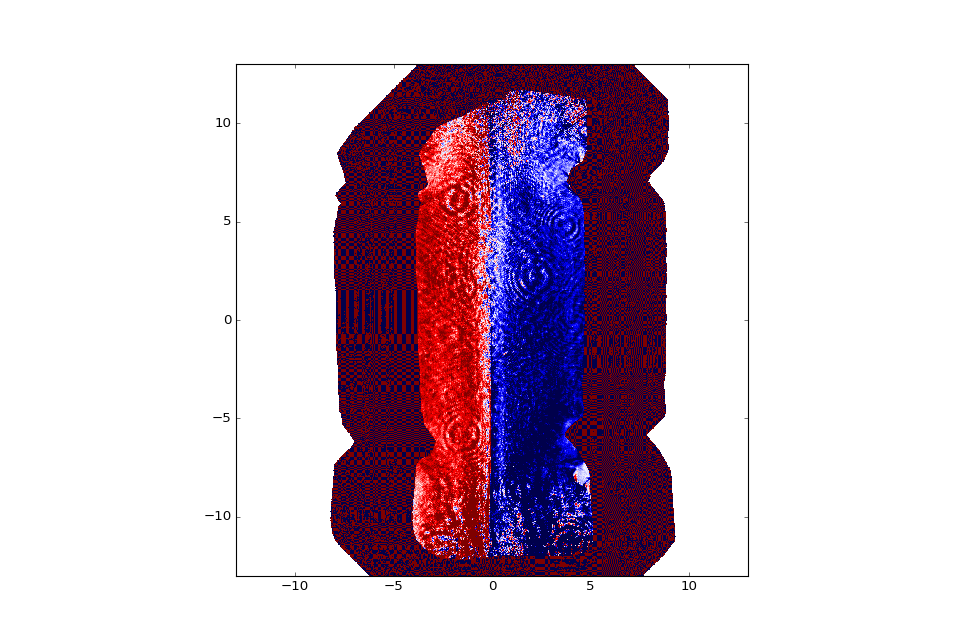

In [73]:
f.plot_data_mm(clim=[-3,3])

In [78]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\thesis\images\chapter2 embedded images"

C:\Users\jdavies\Google Drive\MAGPIE\thesis\images\chapter2 embedded images


In [143]:
fig.savefig('s0513_16 Bfield.png', dpi=300, bbox_inches='tight')

# 12 Frame Images

In [159]:
from magpie_data import OpticalFrames

## s1214_15

In [231]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted


In [232]:
s=OpticalFrames(168,20)
s.logarithm()
s.rotate(-90+56)
#s.plot_rot(frame=2)
s.crop((512,608), xcrop=230, ycrop=300)
#s.plot_crop()

C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:288: RuntimeWarning: divide by zero encountered in log
  self.s_l=[np.log(s_im) for s_im in self.s_n]


<IPython.core.display.Javascript object>


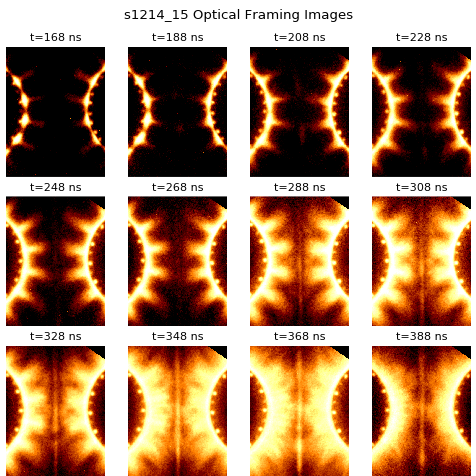

In [233]:
#151.3 mm = 5.96 inches

fig, ax=plt.subplots(3,4, figsize=(5.96,5.96),frameon = False)
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.9,
                wspace=0.1, hspace=0.15)

for i in range(3):
    for j in range(4):
        fin=4*i+j
        ax[i,j].imshow(s.s_c[fin], cmap='afmhot', clim=[0.1,0.9], interpolation='none')
        ax[i,j].axis('off')
        ax[i,j].set_title('t='+str(s.frame_times[fin])+' ns', fontsize=10)
        
fig.suptitle(s.shot+' Optical Framing Images', fontsize=12)
#fig.tight_layout()

In [234]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.shot+'_12frame.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

## s0120B16

In [212]:
cd "~\Google Drive\MAGPIE\data\2016\s0120B16 C RECONNECTION 12 FRAME\s0120B16"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0120B16 C RECONNECTION 12 FRAME\s0120B16


In [213]:
s=OpticalFrames(188,15)
s.logarithm()
s.rotate(-90+25)
#s.plot_rot(frame=2)
s.crop((634,597), xcrop=230, ycrop=300)
#s.plot_crop()

C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:288: RuntimeWarning: divide by zero encountered in log
  self.s_l=[np.log(s_im) for s_im in self.s_n]


<IPython.core.display.Javascript object>


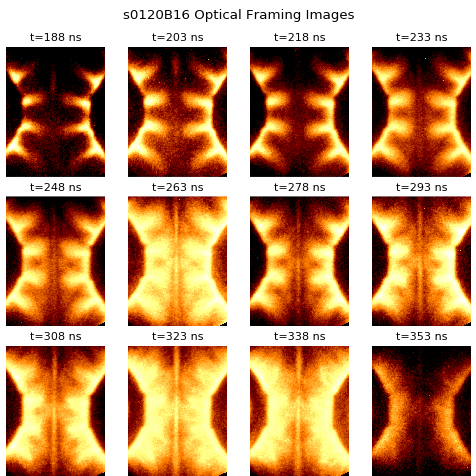

In [227]:
#151.3 mm = 5.96 inches

fig, ax=plt.subplots(3,4, figsize=(5.96,5.96),frameon = False)
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.9,
                wspace=0.1, hspace=0.15)

for i in range(3):
    for j in range(4):
        fin=4*i+j
        ax[i,j].imshow(s.s_c[fin], cmap='afmhot', clim=[0.2,1.0], interpolation='none')
        ax[i,j].axis('off')
        ax[i,j].set_title('t='+str(s.frame_times[fin])+' ns', fontsize=10)
        
fig.suptitle(s.shot+' Optical Framing Images', fontsize=12)
#fig.tight_layout()

In [230]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.shot+'_12frame.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

## s0120_16

In [236]:
cd "~\Google Drive\MAGPIE\data\2016\s0120_16 C RECONNECTION 12 FRAME\s0120_16"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0120_16 C RECONNECTION 12 FRAME\s0120_16


In [237]:
s=OpticalFrames(145,15)
s.logarithm()
s.rotate(-90+22.5)
s.crop((614,563), xcrop=230, ycrop=300)


C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:288: RuntimeWarning: divide by zero encountered in log
  self.s_l=[np.log(s_im) for s_im in self.s_n]


<IPython.core.display.Javascript object>


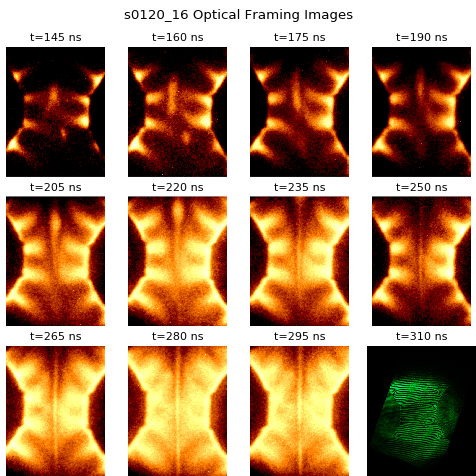

In [238]:
#151.3 mm = 5.96 inches

fig, ax=plt.subplots(3,4, figsize=(5.96,5.96),frameon = False)
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.9,
                wspace=0.1, hspace=0.15)

for i in range(3):
    for j in range(4):
        fin=4*i+j
        ax[i,j].imshow(s.s_c[fin], cmap='afmhot', clim=[0.2,1.0], interpolation='none')
        ax[i,j].axis('off')
        ax[i,j].set_title('t='+str(s.frame_times[fin])+' ns', fontsize=10)
        
fig.suptitle(s.shot+' Optical Framing Images', fontsize=12)

In [239]:
th_folder=r'~\Google Drive\MAGPIE\thesis\images'
fn='chapter4_'+s.shot+'_12frame.pdf'
p=os.path.expanduser(os.path.join(th_folder,fn))
fig.savefig(p, dpi=600)

# Interferometry
w, h=151.3, 235 mm = 5.96, 9.25 inches

In [2]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0119_16 C RECONNECTION 12 FRAME"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0119_16 C RECONNECTION 12 FRAME


In [3]:
rot=-90-20
s0119_16_532=NeLMap2('s0119_16 532nm neL.txt', scale=173, rot_angle=rot)
s=s0119_16_532
title='s0119_16, t=171ns'
s.data=s.data-3e17
s.set_origin(origin=[2906,2182], extent=[-11.5,11.5,-8,8])

In [4]:
i=Interferogram('s0119_16 532nm end on interferometry (4).JPG', rot_angle=rot, scale=s.scale)

<IPython.core.display.Javascript object>


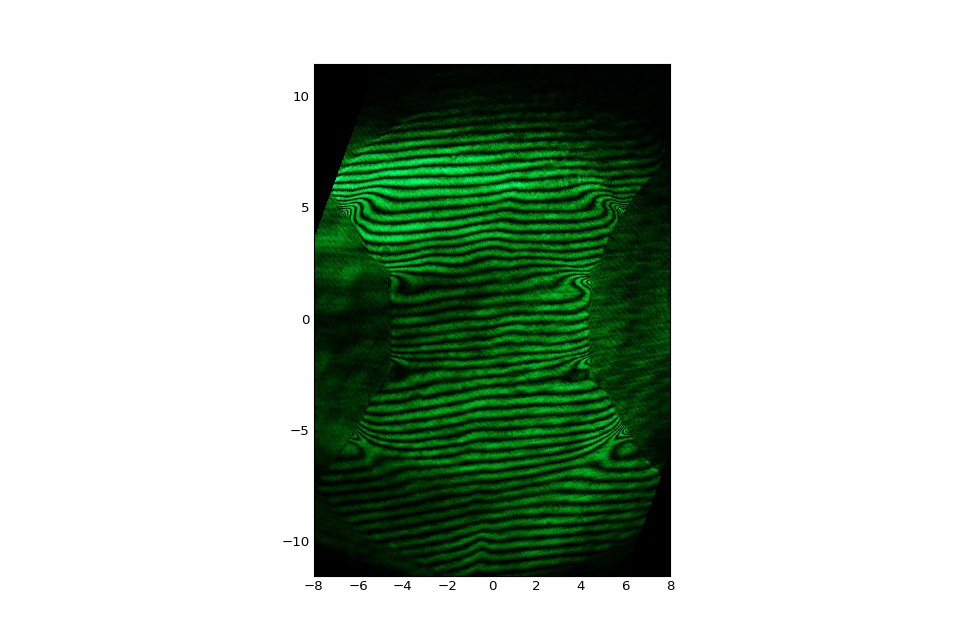

In [5]:
i.set_origin(origin=s.origin, extent=[-11.5,11.5,-8,8])

<IPython.core.display.Javascript object>


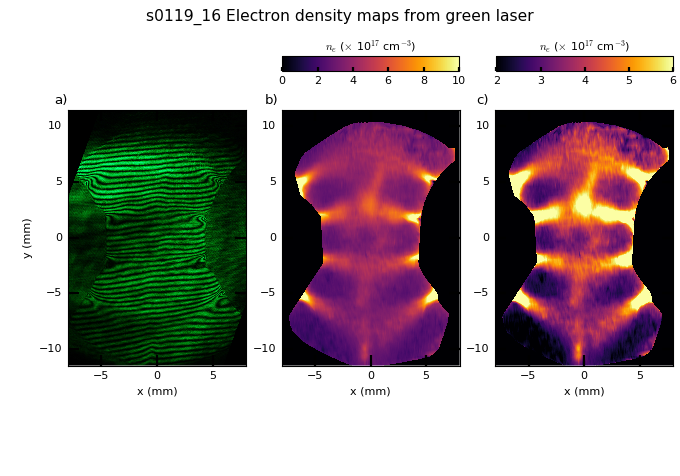

In [69]:
fig, ax=plt.subplots(1,3, figsize=(8.5,5.96))

# raw interferogram

i.plot_data_mm(ax=ax[0])
a=ax[0]
a.set_xlabel('x (mm)',fontsize=10)
a.set_ylabel('y (mm)',fontsize=10)
a.set_xticks([-5,0,5])
a.tick_params(labelsize=10, pad=5, length=10, width=2)
#large dynamic range electron density map
ne1=s.plot_data_mm(clim=[0,10], multiply_by=1e-17, ax=ax[1])

a=ax[1]
a.set_xlabel('x (mm)',fontsize=10)
a.set_xticks([-5,0,5])
a.tick_params(labelsize=10, pad=5, length=10, width=2)

#set up the colourbar
cbar_ax1 = fig.add_axes([0.415, 0.85, 0.26, 0.03])#l,b,w,h
cbar_ax1.tick_params(labelsize=10, pad=5, length=4, width=2)
fig.colorbar(ne1, cax=cbar_ax1, ticks=[0,2,4,6,8,10], orientation='horizontal')
cbar_ax1.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
cbar_ax1.xaxis.set_label_position('top') 

#large dynamic range electron density map
ne2=s.plot_data_mm(clim=[2,6], multiply_by=1e-17, ax=ax[2])

a=ax[2]
a.set_xlabel('x (mm)',fontsize=10)
a.set_xticks([-5,0,5])
a.tick_params(labelsize=10, pad=5, length=10, width=2)

#set up the colourbar
cbar_ax2 = fig.add_axes([0.73, 0.85, 0.26, 0.03])#l,b,w,h
cbar_ax2.tick_params(labelsize=10, pad=5, length=4, width=2)
fig.colorbar(ne2, cax=cbar_ax2, ticks=[2,3,4,5,6], orientation='horizontal')
cbar_ax2.set_xlabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10)
cbar_ax2.xaxis.set_label_position('top') 

#tweak the plots subtly.
fig.subplots_adjust(left=0.1, bottom=0, right=0.99, top=1,
                wspace=0.2, hspace=0)

#title and subfigure labels.
fig.suptitle(s.fn+' Electron density maps from green laser', fontsize=14)

fig.text(s='a)', x=0.08, y=0.78, fontsize=12)
fig.text(s='b)', x=0.39, y=0.78, fontsize=12)
fig.text(s='c)', x=0.7, y=0.78, fontsize=12)

for a in ax
